<a href="https://colab.research.google.com/github/Sanim27/CNN_Cifar10/blob/main/CNN_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
project_name="cifar"

In [3]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

100%|██████████| 135107811/135107811 [00:02<00:00, 47805591.94it/s]


In [4]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path='./data')

In [5]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes= os.listdir(data_dir+"/train")
print(classes)

['test', 'train']
['bird', 'truck', 'dog', 'ship', 'cat', 'deer', 'airplane', 'automobile', 'horse', 'frog']


In [6]:
airplane_files=os.listdir(data_dir+"/train/airplane")
print("no of images in airplane class",len(airplane_files))
airplane_files[:5]

no of images in airplane class 5000


['2743.png', '3954.png', '2054.png', '3034.png', '3633.png']

In [7]:
dog_files=os.listdir(data_dir+"/train/dog")
print("no of images in dog class",len(dog_files))
dog_files[:5]

no of images in dog class 5000


['2743.png', '3954.png', '2054.png', '3034.png', '3633.png']

In [8]:
for class1 in classes:
  print(class1,len(os.listdir(data_dir+"/train/"+class1)))

bird 5000
truck 5000
dog 5000
ship 5000
cat 5000
deer 5000
airplane 5000
automobile 5000
horse 5000
frog 5000


In [9]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [10]:
dataset=ImageFolder(data_dir+"/train",transform=ToTensor())

In [11]:
len(dataset)

50000

In [12]:
dataset[0]

(tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
          [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
          [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
          ...,
          [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
          [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
          [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],
 
         [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
          [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
          [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
          ...,
          [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
          [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
          [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],
 
         [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
          [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
          [0.8118, 0.8157, 0.8235,  ...,

In [13]:
img,label=dataset[0]
print(img.shape)
print(label)

torch.Size([3, 32, 32])
0


In [14]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def show_examples(img,label):
  print('Label:',dataset.classes[label], '('+str(label)+')')
  plt.imshow(img.permute(1,2,0))

Label: airplane (0)


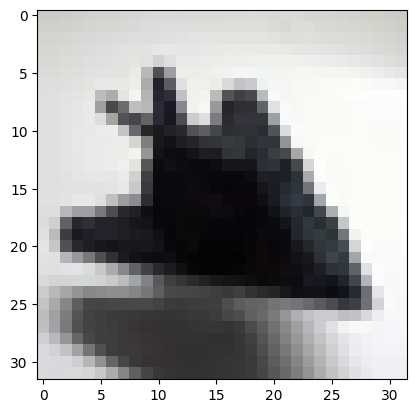

In [17]:
show_examples(*dataset[0])

Label: automobile (1)


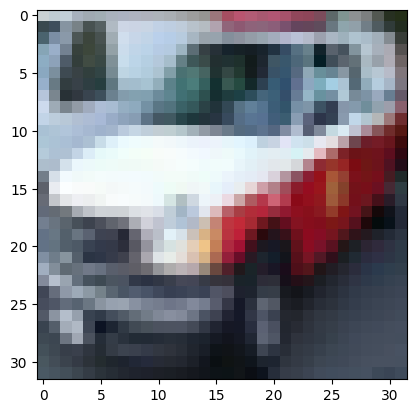

In [18]:
show_examples(*dataset[5006])

In [19]:
random_seed=42
torch.manual_seed(random_seed)

In [20]:
train_size=45000
val_size=len(dataset)-train_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(45000, 5000)

In [21]:
from torch.utils.data import DataLoader
batch_size=128

In [22]:
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_dl=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [23]:
from torchvision.utils import make_grid

In [24]:
def show_batch_images(dl):
  for images,labels in dl:
    fig,ax=plt.subplots(figsize=(16,8))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    n_images = images.size(0)
    break

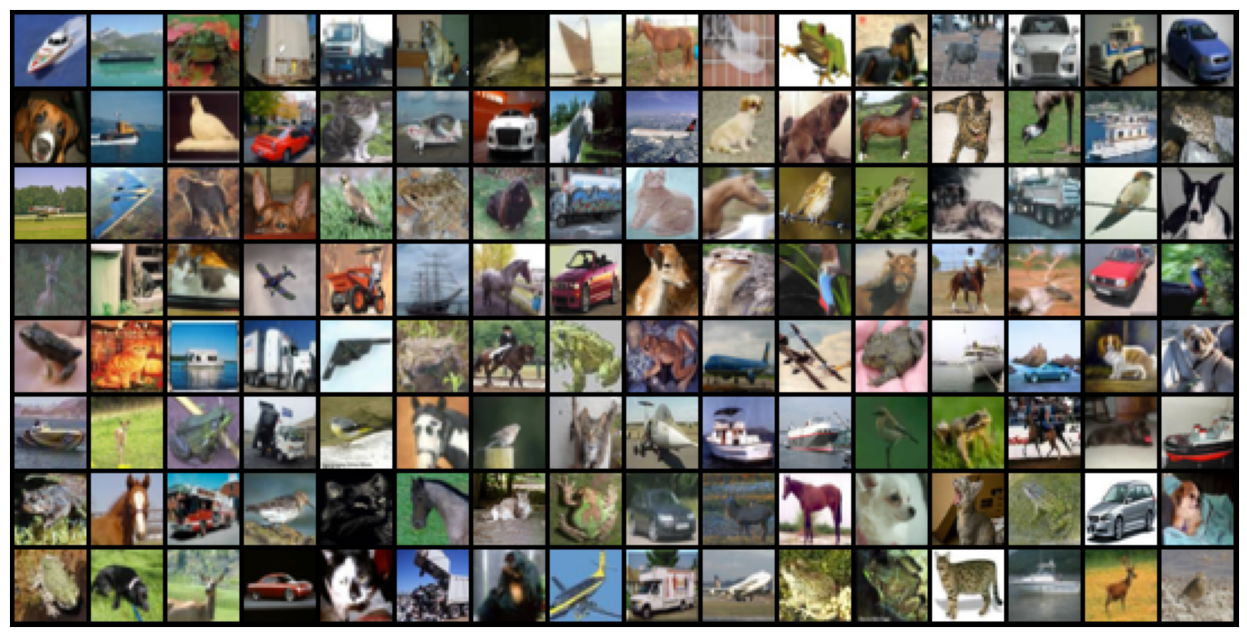

In [25]:
show_batch_images(train_dl)

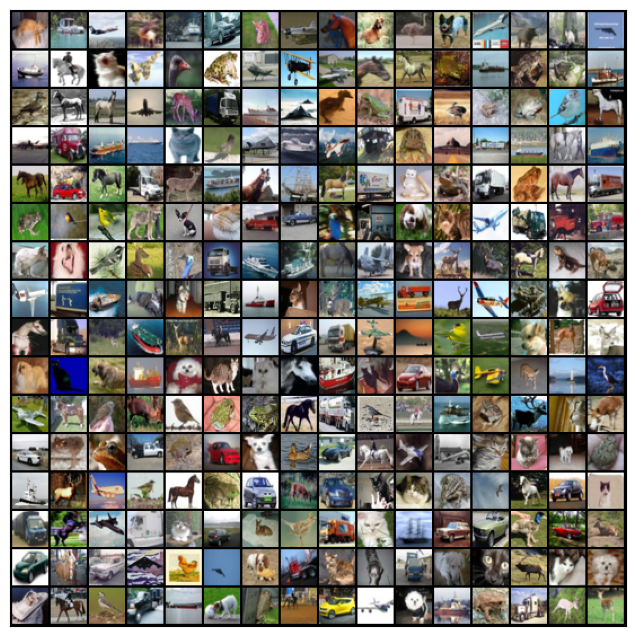

In [26]:
show_batch_images(val_dl)

In [27]:
def apply_kernel(image,kernel):
  ri,ci=image.shape
  rk,ck=kernel.shape
  ro,co=ri-rk+1,ci-ck+1
  output=torch.zeros(ro,co)
  for i in range(ro):
    for j in range(co):
      output[i,j]=torch.sum(image[i:i+rk,j:j+ck] * kernel)
  return output

In [28]:
sample_img=torch.tensor([
    [3,3,2,1,0],
    [0,0,1,3,1],
    [3,5,3,4,2],
    [5,3,4,2,1],
    [2,1,0,0,0],
    [5,6,8,3,1]
],dtype=torch.float32)
kernel=torch.tensor([
    [0,1,2],
    [2,2,0],
    [0,1,1]
],dtype=torch.float32)
apply_kernel(sample_img,kernel)

tensor([[15., 13., 15.],
        [25., 29., 22.],
        [28., 25., 20.],
        [31., 21.,  8.]])

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
conv=nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1)

In [31]:
pool=nn.MaxPool2d(2,2)

In [32]:
model=nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [33]:
for images,labels in train_dl:
  print('images.shape:',images.shape)
  out=conv(images)
  out=pool(out)
  print('out.shape:',out.shape)
  break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [34]:
conv.weight.shape

torch.Size([8, 3, 3, 3])

In [35]:
conv.weight[0]

tensor([[[ 0.0400, -0.0671,  0.1560],
         [ 0.0757,  0.0781, -0.1201],
         [-0.0989,  0.0508,  0.1701]],

        [[ 0.0643,  0.1109, -0.0033],
         [ 0.1575, -0.1299,  0.1855],
         [ 0.0587, -0.1072,  0.1864]],

        [[ 0.0403,  0.0994,  0.1686],
         [-0.1169, -0.1352,  0.1361],
         [-0.0403, -0.1402,  0.0297]]], grad_fn=<SelectBackward0>)

In [36]:
for images,labels in train_dl:
  print('images.shape:',images.shape)
  out=model(images)
  print('out.shape:',out.shape)
  break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [37]:
class ImageClassificationBase(nn.Module):
  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    return loss
  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    acc=accuracy(out,labels)
    return {'val_loss' : loss.detach(), 'val_acc' :acc}
  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    batch_accs=[x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}
  def epoch_end(self,epoch,result):
    print("Epoch [{}] ,train_loss: {:.4f} ,val_loss: {:.4f} ,val_acc: {:.4f} ".format(epoch,result['train_loss'],result['val_loss'],result['val_acc']))

def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [38]:
class Cifar10CnnModel(ImageClassificationBase):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,padding=1),
        # output shape: 32 x 32 x 32
        nn.ReLU(),
        # output shape: 32 x 32 x 32
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        # output shape: 32 x 32 x 64
        nn.ReLU(),
        # output shape: 32 x 32 x 64
        nn.MaxPool2d(2,2),  # output shape : 16 x 16 x 64

        nn.Conv2d(64,128,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # output shape : 8 x 8 x 128

        nn.Conv2d(128,256,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # output shape : 4 x 4 x 256

        nn.Flatten(),
        nn.Linear(4*4*256,1024),
        nn.ReLU(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self,xb):
    return self.network(xb)

In [39]:
Cifar_model=Cifar10CnnModel()
Cifar_model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [40]:
for images,labels in train_dl:
  print('images.shape:',images.shape)
  out=Cifar_model(images)
  print(out.shape)
  print('output [0] :',out[0])
  break

images.shape: torch.Size([128, 3, 32, 32])
torch.Size([128, 10])
output [0] : tensor([ 0.0250, -0.0068, -0.0486, -0.0393, -0.0338, -0.0664,  0.0317, -0.0143,
         0.0131, -0.0541], grad_fn=<SelectBackward0>)


In [41]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device
  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)
  def __len__(self):
    return len(self.dl)

In [42]:
device=get_default_device()
device

device(type='cuda')

In [43]:
train_dl=DeviceDataLoader(train_dl,device)
val_dl=DeviceDataLoader(val_dl,device)
to_device(Cifar_model,device)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [44]:
def fit(epochs,lr,model,train_dl,val_dl,opt_func=torch.optim.SGD):
  history=[]
  optimizer=opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    model.train()
    train_losses=[]
    for batch in train_dl:
      loss=model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result=evaluate(model,val_dl)
    result['train_loss']=torch.stack(train_losses).mean().item()
    model.epoch_end(epoch,result)
    history.append(result)
  return history

@torch.no_grad()
def evaluate(model,val_dl):
  model.eval()
  outputs=[model.validation_step(batch) for batch in val_dl]
  return model.validation_epoch_end(outputs)

In [46]:
model=to_device(Cifar10CnnModel(),device)

In [47]:
evaluate(model,val_dl)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


{'val_loss': 2.3029210567474365, 'val_acc': 0.10143611580133438}

In [48]:
num_epochs=10
opt_func=torch.optim.Adam
lr=0.001

In [49]:
history0=fit(num_epochs,lr,model,train_dl,val_dl,opt_func)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [0] ,train_loss: 1.7677 ,val_loss: 1.4678 ,val_acc: 0.4499 
Epoch [1] ,train_loss: 1.2473 ,val_loss: 1.1160 ,val_acc: 0.5966 
Epoch [2] ,train_loss: 0.9720 ,val_loss: 0.9229 ,val_acc: 0.6753 
Epoch [3] ,train_loss: 0.7685 ,val_loss: 0.8509 ,val_acc: 0.7074 
Epoch [4] ,train_loss: 0.6252 ,val_loss: 0.7294 ,val_acc: 0.7461 
Epoch [5] ,train_loss: 0.5015 ,val_loss: 0.7063 ,val_acc: 0.7626 
Epoch [6] ,train_loss: 0.3848 ,val_loss: 0.8201 ,val_acc: 0.7408 
Epoch [7] ,train_loss: 0.2967 ,val_loss: 0.8094 ,val_acc: 0.7599 
Epoch [8] ,train_loss: 0.2127 ,val_loss: 0.9655 ,val_acc: 0.7532 
Epoch [9] ,train_loss: 0.1609 ,val_loss: 0.9807 ,val_acc: 0.7614 


In [51]:
def plot_accuracies(history):
  accuracies=[x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs No. of epochs')

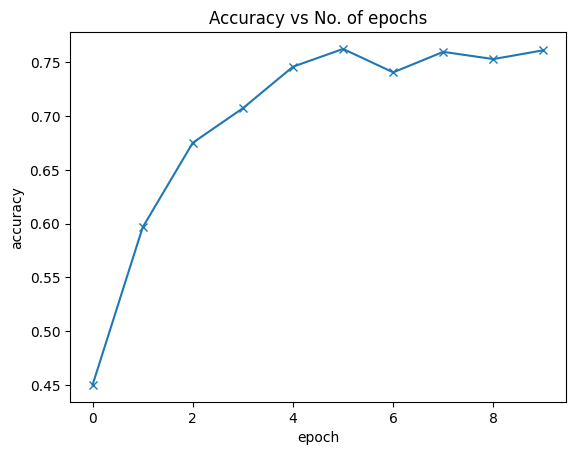

In [52]:
plot_accuracies(history0)

In [53]:
def plot_losses(history):
  train_losses=[x.get('train_loss') for x in history]
  val_losses=[x['val_loss'] for x in history]
  plt.plot(train_losses,'-bx')
  plt.plot(val_losses,'-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs No. of epochs')

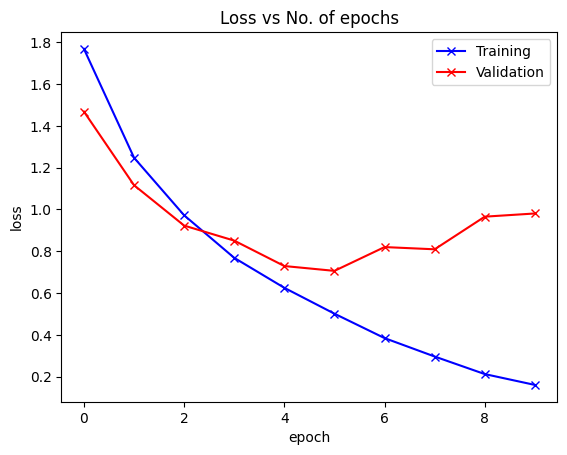

In [54]:
plot_losses(history0)

In [55]:
test_dataset=ImageFolder(data_dir+"/test",transform=ToTensor())

In [56]:
def predict_images(img,model):
  xb=to_device(img.unsqueeze(0),device)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return dataset.classes[preds[0].item()]

Label:  airplane Predicted:  airplane


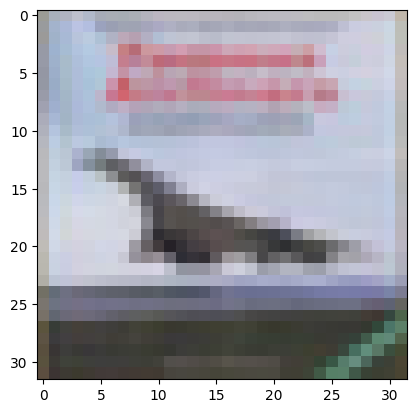

In [57]:
img,label=test_dataset[0]
plt.imshow(img.permute(1,2,0))
print('Label: ',dataset.classes[label], 'Predicted: ',predict_images(img,model))

Label:  automobile Predicted:  truck


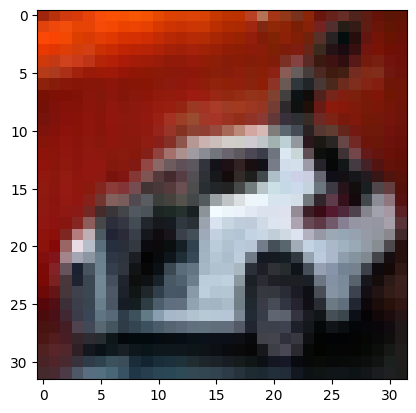

In [58]:
img,label=test_dataset[1000]
plt.imshow(img.permute(1,2,0))
print('Label: ',dataset.classes[label], 'Predicted: ',predict_images(img,model))

Label:  bird Predicted:  bird


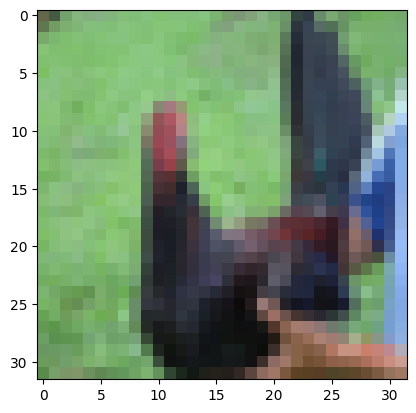

In [59]:
img,label=test_dataset[2000]
plt.imshow(img.permute(1,2,0))
print('Label: ',dataset.classes[label], 'Predicted: ',predict_images(img,model))

In [60]:
test_loader=DeviceDataLoader(DataLoader(test_dataset,batch_size*2),device)
result=evaluate(model,test_loader)
result

{'val_loss': 0.9601417779922485, 'val_acc': 0.7574218511581421}